# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.078864e+01     6.287051e+00
 * time: 0.005841970443725586
     1     2.699724e+01     4.114367e+00
 * time: 0.01738715171813965
     2     2.317155e+01     9.154964e+00
 * time: 0.04525399208068848
     3     1.291911e+01     1.797505e+00
 * time: 0.07713603973388672
     4     1.229405e+01     3.295717e+00
 * time: 0.09851312637329102
     5     1.221833e+01     1.624133e+00
 * time: 0.11966609954833984
     6     1.113793e+01     2.696068e+00
 * time: 0.1405010223388672
     7     1.038996e+01     1.766878e+00
 * time: 0.16105008125305176
     8     9.602361e+00     1.125953e+00
 * time: 0.18162012100219727
     9     9.135645e+00     1.135101e+00
 * time: 0.20273399353027344
    10     8.882884e+00     6.599924e-01
 * time: 0.2237720489501953
    11     8.784813e+00     5.627425e-01
 * time: 0.24458718299865723
    12     8.702892e+00     7.579142e-01
 * time: 0.26026296615600586
    13     8.645621e+00     4.082980e-01
 * time: 

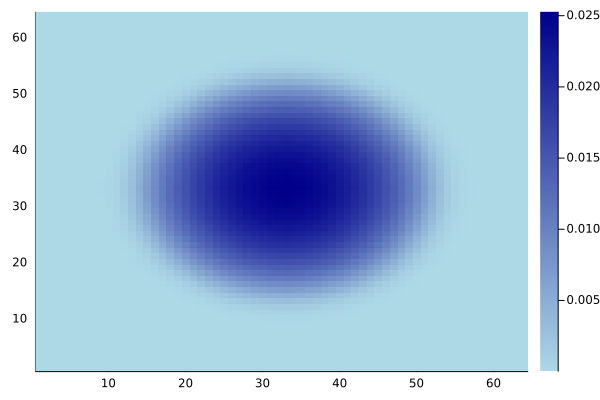

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)